_パーセプトロンとロジスティック回帰を用いて分類を行う。_

**パーセプトロン**
パーセプトロンとは複数の入力を受け取り、
それぞれの値に重みをかけあわせ足しあげたものを出力するモデルです。
パーセプトロンはシンプルなモデルなため実際の現場では使われることはほとんどありませんが、
ニューラルネットワークやディープラーニングの元となっているモデルのため基礎となります。
また別の章でSVC(サポートベクターマシン)を見ていきますが、そこでもパーセプトロンが理解できていないとSVCも理解できません。
ではパーセプトロンを見ていきましょう。

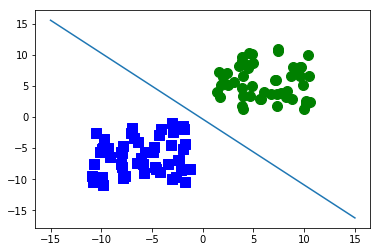

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 予測
def predict(w_vec, x_vec):
    output = np.dot(w_vec, x_vec)
    if output >= 0:
        res = 1
    else:
        res = -1
    return [res, output]

# 学習
def train(w_vec, x_vec, label):
    [res, output] = predict(w_vec, x_vec)
    lr = 0.5
    if output * label <= 0:
        wtmp = w_vec + lr*label*x_vec
        return wtmp
    else:
        return w_vec

def create_dataset(item_num):
    x1_1=np.ones(int(item_num/2))+10*np.random.random(int(item_num/2))
    x1_2=np.ones(int(item_num/2))+10*np.random.random(int(item_num/2))
    x2_1=-np.ones(int(item_num/2))-10*np.random.random(int(item_num/2))
    x2_2=-np.ones(int(item_num/2))-10*np.random.random(int(item_num/2))
    z=np.ones(int(item_num/2)) # バイアス項、今回は1に固定
    return np.c_[x1_1,x1_2,z], np.c_[x2_1,x2_2,z]

if __name__ == "__main__":
    train_data = 100 # 学習データ
    loop_num   = 1000 # 学習回数
    init_w_vec = [1, -1, 1] # 重みベクトルの適当な初期値

    x1,x2 = create_dataset(train_data)

    class_x=np.array(np.r_[x1,x2])

    # 教師ラベルを1 or -1で振って1つのベクトルにまとめる
    label1=np.ones(int(train_data/2))
    label2=-1*np.ones(int(train_data/2))
    label_x=np.array(np.r_[label1,label2])

    wvec=np.vstack((init_w_vec,init_w_vec))
    
    # ループ回数の分だけ繰り返しつつ、重みベクトルを学習させる
    for j in range(loop_num):
        for i in range(train_data):
            wvec_new=train(wvec[-1],class_x[i,:],label_x[i])
            wvec=np.vstack((wvec,wvec_new))
    w=wvec[-1] # 重みベクトルを垂直に足していった最後のものを採用する

    # print(w)

    # 分離直線を引く
    x_fig=range(-15,16)
    y_fig=[-(w[0]/w[1])*xi-(w[2]/w[1]) for xi in x_fig]

    # プロット
    plt.scatter(x1[:,0],x1[:,1],marker='o',color='g',s=100)
    plt.scatter(x2[:,0],x2[:,1],marker='s',color='b',s=100)
    plt.plot(x_fig,y_fig)
    plt.show()


◆パーセプトロンからロジステック回帰へ

パーセプトロン（単純及び単層パーセプトロン）はシンプルな分、
理解しやすかったですが、線形分離可能な問題
（つまり1本の直線で線を引いて分類出来ない問題）しか解けませんでした。

これを多層にした多層パーセプトロン（ニューラルネットワーク）にすることで線形分離不可能な問題にも 適応することができます。

ここでは線形分離不可能な問題にも適用可能なロジステック回帰に関して解説していきます。

これはパーセプトロンとは別のアプローチです。

◆ロジステック(ロジスティック）回帰

ロジステック回帰(logistice regression)は出力変数が1もしくは0の2値になる２値分類を予測する手法です。

ロジステック回帰は分類モデルで、教師あり学習であり、線形分離可能な問題に対してのみ高い性能を発揮します。

ロジステック回帰の名前には「回帰」とついておりますが、分類のためのアルゴリズムですので、回帰とは混同しないようにしましょう。

つまり、ロジステック回帰は、線形分類問題と二値分類問題に対するアルゴリズムになりますので、
2つのグループに分けたい問題、予測したい場合にロジステック回帰を活用できます。

特徴として、データを線形に分類できる手法なため、データが 線形分離可能(1本の直線で分類 できること)な場合に有効な手法になります。

例えば「メールのスパムフィルタ」などがあります。

他には、タイタニック号のデータを用いたします。
「性別」と「年齢」の2つの特徴を用いて、生存確率を予測するモデルも作れます。

◆シグモイド関数(ロジステック関数)
ニューラルネットワークの章でも登場しますが、ここでも解説致します。

シグモイド関数は、ロジステック関数とも呼ばれます。

下記はシグモイド関数の式になります。

σ(z) = 1 / {1 + e(-z)}

zはこの場合、総入力であり、重みとサンプルの特徴量の線形結合です。

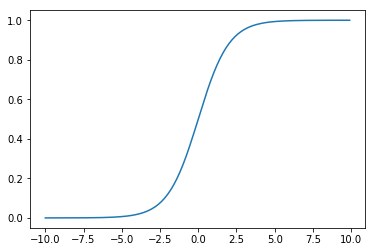

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

#0.1の感覚で-10～10未満のデータを生成
z = np.arange(-10, 10, 0.1)

sig = sigmoid(z)
plt.plot(z, sig)
plt.show()

◆ロジステック回帰の実装
ロジステック回帰を実装するには、sckit-learnのLogisticRegressionを使うことでモデルの実装が可能です。

このレクチャーでは、statsmodels.apiから、データセットfairを扱います。

このデータセットには、6336人の女性の属性（年齢や信仰心など）と、それぞれの女性が他の男性と不倫に費やした時間が含まれています。(ちなみに英語で「不倫」は"afffair"と訳されます)

この節のゴールとして、女性の属性データから不倫の有無を判定します。

まずはデータセットを読み込み、データの内容を把握しましょう。

データの内容は、padasのhead()で確認できます。

In [77]:
import statsmodels.api as s
import pandas as pd
#データセットを読み込み、内容を把握
df = s.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


最後の列の"affair(不倫)"に費やした日数です
これが０でなければ不倫経験ありとして、０であれば不倫経験なしとします。
この節では、ロジスティック回帰で不倫経験があるかないかを判定する分類を行います。

In [78]:
#データ構造を確認する
df.shape

(6366, 9)

続いて、不倫経験があるかないかを判定する関数have_affai()を自作します。
これをapply()関数に適用することで、新しい列'affair_experience'を作成します。

In [79]:
def have_affair(x):
    if x != 0:
        return 1
    else:
        return 0

#applyを使って、不倫経験有無を表す新しい列affair_experienceを作る
df['affair_experience'] = df['affairs'].apply(have_affair)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_experience
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [80]:
#不倫の有無でグループ分けする
df.groupby('affair_experience').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair_experience,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


続いて、このデータセットには、
"occupation(職業)"や"hus_occupation(ご主人の職業)"が含まれていますが、
これらはカテゴリー型のデータになっているので、
数字の大小に関係がありません。

このような変数はダミー変数などを置いて処理することもありますが、
今回は削除して対処しましょう。
また、"affairs"も"affair_experience"で置き換えたので削除します。

さらに、目的変数として使う"affair_experience"をYに、他の特徴量をXに格納しておきます。

In [81]:
#必要のない列の削除
df = df.drop(['occupation', 'occupation_husb', 'affairs'], axis=1)
#Xに特徴量を格納
X = df.ix[:, :6]
display(X)
#Yに特徴量を格納
Y = df.ix[:, 6]
Y.head()

C:\Users\masayoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,rate_marriage,age,yrs_married,children,religious,educ
0,3.0,32.0,9.0,3.0,3.0,17.0
1,3.0,27.0,13.0,3.0,1.0,14.0
2,4.0,22.0,2.5,0.0,1.0,16.0
3,4.0,37.0,16.5,4.0,3.0,16.0
4,5.0,27.0,9.0,1.0,1.0,14.0
5,4.0,27.0,9.0,0.0,2.0,14.0
6,5.0,37.0,23.0,5.5,2.0,12.0
7,5.0,37.0,23.0,5.5,2.0,12.0
8,3.0,22.0,2.5,0.0,2.0,12.0
9,3.0,27.0,6.0,0.0,1.0,16.0


0    1
1    1
2    1
3    1
4    1
Name: affair_experience, dtype: int64

前処理を行ったら、必要なライブラリをimportして、モデルを作成して、スコアを測定しましょう。

In [84]:
from sklearn.linear_model import LogisticRegression #ロジスティック回帰
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#モデルの作成(初期化)
model = LogisticRegression()

#値の学習
model.fit(X,Y)

#スコア測定
model.score(X,Y)

C:\Users\masayoshi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.72133207665724164

モデルのスコアは0.72133となり、そこそこのスコアが得られました。

続いて、データを訓練データとテストデータに２分（ホールドアウト法）してaccuracy scoreを測定します。

In [85]:
#分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
#モデルの作成(初期化)
model2 = LogisticRegression()
model2.fit(X_train, Y_train)
#値の予測
class_predict = model2.predict(X_test)
#テストデータを使って、どれくらい正しいのかどうかを計算
accuracy_score(Y_test, class_predict)

0.72173366834170849

accuracy scoreは0.72864となり、過学習はしていないことがわかります。accuracy scoreなど、詳しく学びたい方は別章「評価指標」を参考にしてください。

◆まとめ
この章では、パーセプトロンとロジスティック回帰に関して学んできました。
パーセプトロンはSVMやニューラルネットワークを学ぶ上では基礎になりますので、おさえておきましょう。

◆演習問題
癌のデータを学習し、悪性か良性を2値分類する識別モデル

In [91]:
import numpy as np
#癌のデータを読み込む
from sklearn.datasets import load_breast_cancer 
from sklearn import linear_model
#ランダムに学習・テストデータをシャッフルして分割するモジュール
from sklearn.model_selection import ShuffleSplit
from sklearn.externals import joblib

data = load_breast_cancer()

#print(data.DESCR)

X = data.data

X.shape #データの個数が569、特徴量が30次元

(569, 30)

In [94]:
y = data.target
print(data.target_names)#malignantが悪性、benignが良性

['malignant' 'benign']


In [95]:
n_samples = X.shape[0]
n_samples

569

In [97]:
n_train = n_samples//2 #半分のデータを学習に使う
n_train

284

In [99]:
n_test = n_samples - n_train
n_test

285

In [112]:
train_index = range(0, n_train)
print(train_index)

range(0, 284)


In [109]:
test_index = range(n_train, n_samples)
test_index

range(284, 569)

In [110]:
X_train = X[train_index]#学習データ
X_test = X[test_index]#テストデータ

In [113]:
y_train = y[train_index] #学習データのラベル
y_test = y[test_index] #テストデータのラベル

In [115]:
#モデルの作成
model = linear_model.LogisticRegression() #ロジスティック回帰

In [117]:
#学習
model.fit(X_train, y_train)

print(model.score(X_train, y_train)) #モデルの精度確認
print(model.score(X_test, y_test)) #テストデータの精度

0.964788732394
0.950877192982


In [118]:
model.predict(X_test)  #テストデータの識別

def wrong_count(X_test, y_test, wrong = 0):
    for i, j in zip(model.predict(X_test), y_test):
        if i==j:
            print(i, j)
        else:
            print(i, j, "不正解")
            wrong += 1
    return wrong

wrong = wrong_count(X_test, y_test)
print("間違った回数：", wrong)
print("{0}/{1} = {2}".format(wrong, n_test, 1 - wrong / n_test))

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0 不正解
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 0
1 1
0 0
0 1 不正解
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 0 不正解
1 1
1 1
1 1
0 0
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1 不正解
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 0
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
0 0
1 1
0 1 不正解
0 0
1 1
0 0
1 1
1 1
1 1
0 1 不正解
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
0 1 不正解
0 1 不正解
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1 不正解
1 1
1 1
0 0
1 1
0 1 不正解
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 0
1 1
0 1 不正解
0 0
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
0 0
1 1
0 0
0 0
1 1
1 1
1 1
0 0
1 1


In [119]:
#モデルの保存
filename = 'breast_cancer_model.sav'
joblib.dump(model, filename)

#モデルをロードする
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.950877192982
